# PS1#49 - Estimating a PMF
<div style="text-align: right;font-size: 0.8em">Last updated: 2022-11-06</div>

This notebook requires `numpy`, `matplotlib`, and `pandas` to run. If the following cell raises an error, install them first.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1234)

The goal of this exercise is to estimate the PMF $p$ of an arbitrary DRV $X$ from independent realizations.

The random variable $X$ we consider takes values in $\{0, \dots, K-1\}$, with $K=9$, and has the following PMF

| $x$  | $0$  | $1$  | $2$  | $3$  | $4$  | $5$  | $6$  | $7$  | $8$  |
|------|------|------|------|------|------|------|------|------|------|
| $p(x)$  | $0.1$| $0.2$|$0.05$|$0.25$| $0$  |$0.05$|$0.1$ |$0.05$| $0.2$|

In [2]:
K = 9
p = np.array([0.1, 0.2, 0.05, 0.25, 0., 0.05, 0.1, 0.05, 0.2])

## Part 1
We start by implementing functions that compute the different variables.

### Question 1
Fill in the function `get_independent_realizations` that returns $N$ independent realizations of the random variable $X$.

_Hint: use the function `np.random.choice`_.

In [3]:
def get_independent_realizations(N: int) -> np.ndarray:
    """ Returns N independent realizations of the random variable $X$
    Args:
        N: number of realizations
    Returns:
        The realizations as an array of shape (N,)
    """
    ### BEGIN SOLUTION
    return np.random.choice(
        a=np.arange(K),
        size=N,
        p=p
    )
    ### END SOLUTION

In [4]:
assert get_independent_realizations(50).shape == (50,)
assert (get_independent_realizations(50) < K).all()
assert (get_independent_realizations(50) >= 0).all()

### Question 2

Fill in the function `get_counts` that transforms an array of $N$ realizations of $X$ into an array of length $K$ whose $k$-th component is the value of $C_k^N$.

In [5]:
def get_counts(realizations: np.ndarray) -> np.ndarray:
    """ Returns the array of values of $C_k^N$ given realizations of $X$
    Args:
        realizations: array of shape (N,) representing the realizations of $X$
    Returns:
        An array of shape (K,) whose $k$-th value is the value of $C_k^N$
    """
    ### BEGIN SOLUTION
    return np.array([
        (realizations == k).sum() for k in range(K)
    ])
    ### END SOLUTION

In [6]:
realizations = get_independent_realizations(50)
assert get_counts(realizations).shape == (K,)
assert get_counts(realizations).sum() == realizations.shape[0]

### Question 3

Fill in the function `get_frequencies` that transforms the array of values of $C_k^N$ into the one of the values of $F_k^N$.

_Hint: the total number of realizations is the sum of all the counts_

In [7]:
def get_frequencies(counts: np.ndarray) -> np.ndarray:
    """ Returns the array of values of $F_k^N$ given the one of $C_k^N$.
    Args:
        counts: array of shape (K,) whose $k$-th value is the value of $C_k^N$
    Returns:
        An array of shape (K,) whose $k$-th value is the value of $F_k^N$
    
    """
    ### BEGIN SOLUTION
    N = counts.sum()
    return counts / N
    ### END SOLUTION

In [8]:
counts = get_counts(get_independent_realizations(50))
freqs = get_frequencies(counts)
assert freqs.shape == (K,), f"The shape should be (K,). You have: {freqs.shape}"
assert np.isclose(freqs.sum(), 1), f"The sum of frequencies should be 1. You have: {freqs.sum()}"

## Part 2

We explore the properties of a single random variable $F_k^N$ for different values of $N$.

### Question 4
The variable $C_k^N$ used to define $F_k^N$ follows the binomial distribution $\mathcal{B}(N, p(k))$.
Fill in the function `pmf_binomial` that takes as inputs $N$ and $p$ and outputs an array of size $N$ whose $n$-th value is the PMF of the binomial distribution in $n$.

_Hint: use `math.comb(N, n)` to compute the binomial coefficient $N\choose n$._

In [9]:
def pmf_binomial(N: int, p: int) -> np.ndarray:
    """ Computes the PMF of the binomial distribution $\mathcal{B}(N, p).
    Args:
        N: first parameter of the distribution
        p: second parameter of the distribution
    Returns:
        An np.ndarray of shape (N,) whose $n$-th value is the PMF evaluated at n.
    """
    ### BEGIN SOLUTION
    return np.array([
        math.comb(N, n) * p**n * (1-p)**(N-n) for n in range(N+1)
    ])
    ### END SOLUTION

In [10]:
assert pmf_binomial(50, 0.3).shape == (51,)
assert np.isclose(pmf_binomial(1, 0.2), np.array([0.8, 0.2])).all()

## Question 5

The variable $F_k^N$ has the same PMF as $C_k^N$, but shifted and scaled. Formally: $$p_{F_k^N}(x) = p_{C_k^N}\left(N\cdot x\right)$$
As a result, we can use the function `pmf_binomial` to plot the PMF of $F_k^N$ simply by relabeling the $x$-axis.

The function `plot_pmf_frequencies` uses your implementation of `pmf_binomial` to plot the PMF of $F_k^N$. Plot the PMF of $F_k^N$ for $N\in\{1, 5, 25, 100\}$ and $k = 1$ by calling the function multiple times.

What do you observe?

In [11]:
def plot_pmf_frequencies(N: int, k: int) -> None:
    proba = p[k]
    pmf_values = pmf_binomial(N, proba)
    x = np.linspace(0, 1, num=N+1, endpoint=True)
    plt.bar(x, pmf_values, width=0.5/N, label="PMF")
    
    # Plotting expectation and standard deviation
    std = np.sqrt(proba * (1 - proba)/N)
    plt.vlines(proba, 0, pmf_values.max(), colors='red', linestyles='dashed', label=r"$\mathbb{E}[F_k^N]$")
    plt.axvspan(proba - std, proba + std, color='red', alpha=0.1, label=r"$\mathbb{E}[F_k^N] \pm \sqrt{\mathrm{Var}[F_k^N]}$")
    plt.title(f"PMF of $F_k^N$ ($N = {N}$)")
    plt.legend(loc='upper right')
    plt.show()

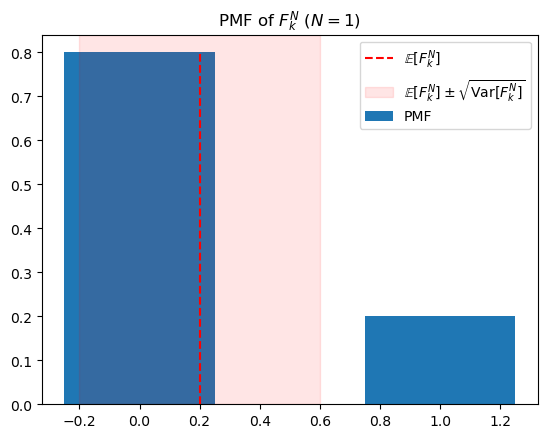

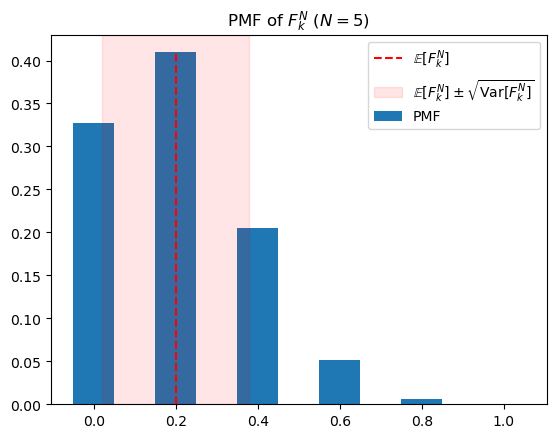

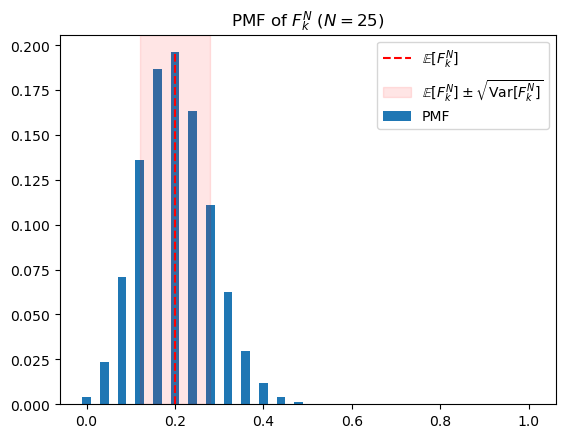

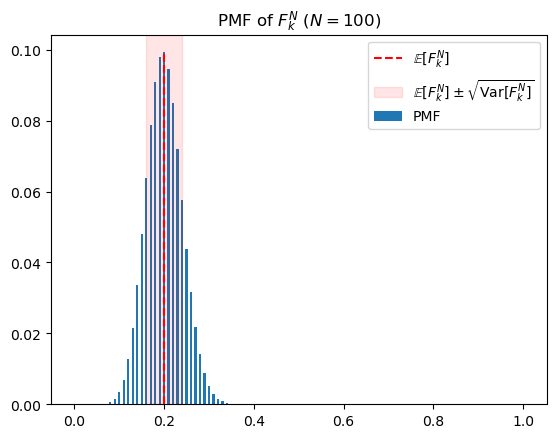

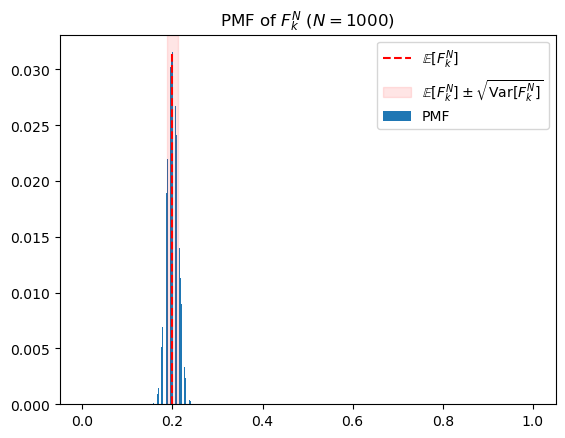

In [12]:
### BEGIN SOLUTION
plot_pmf_frequencies(1, k=1)
plot_pmf_frequencies(5, k=1)
plot_pmf_frequencies(25, k=1)
plot_pmf_frequencies(100, k=1)
plot_pmf_frequencies(1000, k=1)
### END SOLUTION

## Part III

We decide to use the value of $F_k^N$ as an approximation of $p(k)$.

### Question 6
Fill in the function `approximate_pmf` that takes as input the number $N$ of realizations of $X$ to use and outputs an approximation of the PMF.

In [13]:
def approximate_pmf(N: int) -> np.ndarray:
    """ Approximates the PMF of $X$ by the value of $F_k^N$.
    Args:
        N: the number of realizations of $X$
    """
    ### BEGIN SOLUTION
    realizations = get_independent_realizations(N)
    counts = get_counts(realizations)
    freqs = get_frequencies(counts)
    return freqs
    ### END SOLUTION

### Question 7

The function `plot_approximate_pmf` uses your implementation of `approximate_pmf` to plot the approximation of the PMF and compare it against the true PMF.

Run it several times with increasing values of $N$, e.g., $N\in\{1, 5, 25, 100, 1000\}$. Comment.

In [14]:
def plot_approximate_pmf(N: int) -> None:
    x = np.arange(K)
    approx_pmf = approximate_pmf(N)
    df = pd.DataFrame({
        'x': x,
        r'$F_k^N$': approx_pmf,
        '$p(k)$': p
    })
    df.plot.bar(x='x')
    plt.xlabel(r'$k$')
    plt.ylabel('PMF')
    plt.title(f'Approximation of the PMF ($N = {N}$)')
    plt.ylim(0, 1.05)
    plt.show()

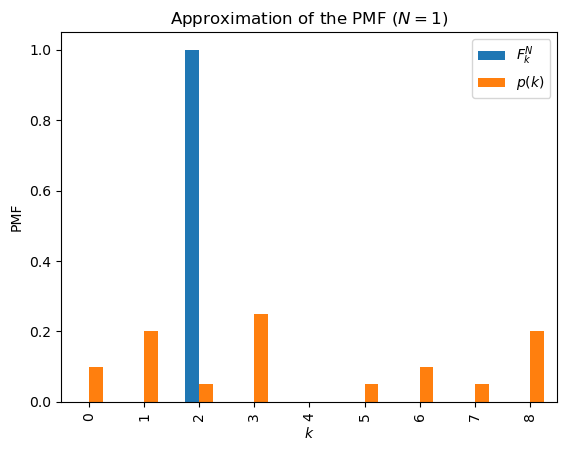

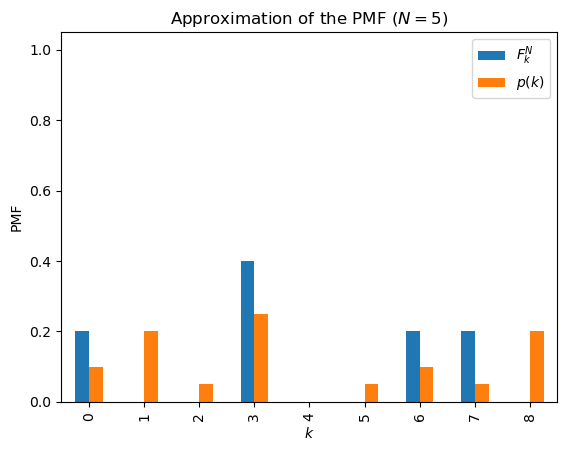

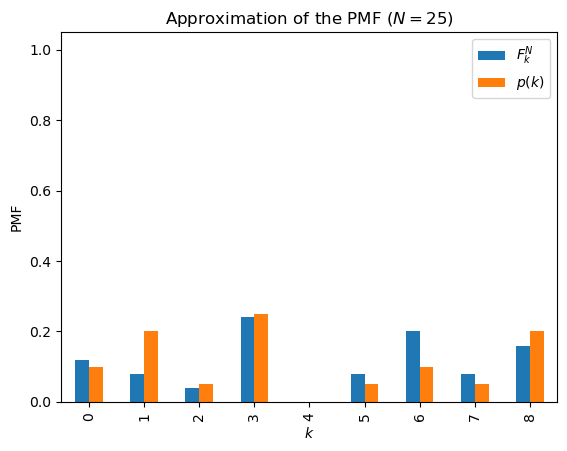

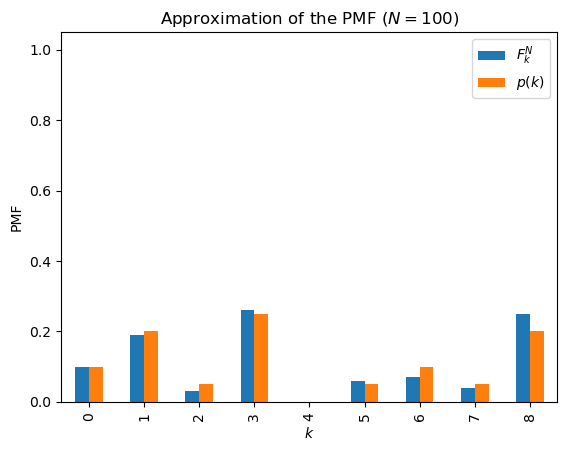

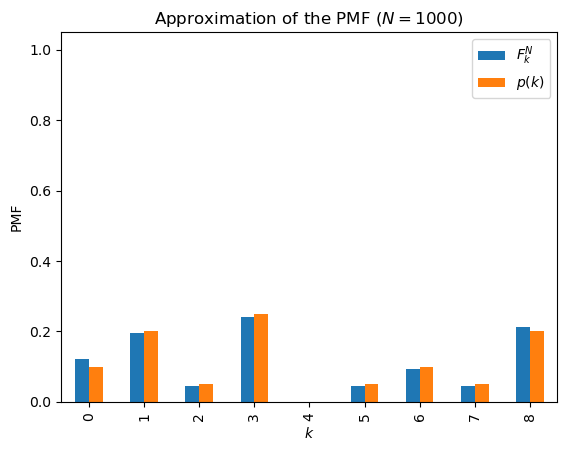

In [15]:
### BEGIN SOLUTION
plot_approximate_pmf(1)
plot_approximate_pmf(5)
plot_approximate_pmf(25)
plot_approximate_pmf(100)
plot_approximate_pmf(1000)
### END SOLUTION